In [1]:
import os

from matplotlib import pyplot as plt
from torchvision import transforms
from nuwa_pytorch import VQGanVAE
from PIL import Image
import numpy as np
import torch

In [2]:
os.environ["CUDA_DEVICE_ORDER"]    = "PCI_BUS_ID"
os.environ["CUDA_VISIBLE_DEVICES"] = "1"

DEVICE = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

print(f'             DEVICE : {DEVICE}')
print(f'Current cuda DEVICE : {torch.cuda.current_device()}')
print(f'Count of using GPUs : {torch.cuda.device_count()}')

             DEVICE : cuda
Current cuda DEVICE : 0
Count of using GPUs : 1


/opt/conda/envs/torch_1.x/lib/python3.10/site-packages/torch/cuda/__init__.py:497: UserWarning: Can't initialize NVML
  warnings.warn("Can't initialize NVML")


In [3]:
image = Image.open(f'samples/doggy.jpeg')
image = image.resize((256, 256))

In [4]:
transform = transforms.ToTensor()
tensor    = transform(image).unsqueeze(0).to(DEVICE)
tensor.size()

torch.Size([1, 3, 256, 256])

In [5]:
vae = VQGanVAE(
        dim               =  512,
        channels          =    3,
        image_size        =  256,
        num_layers        =    4,
        num_resnet_blocks =    2,
        vq_codebook_size  = 8192,
        vq_decay          =  0.8,
    ).to(DEVICE)


for _ in range(50):
    loss = vae(tensor, return_loss = True)
    loss.backward()

    disc_loss = vae(tensor, return_discr_loss = True)
    disc_loss.backward()
    
    print(f'              loss : {loss.item():.2f}')
    print(f'discriminator loss : {disc_loss.item():.2f}')

/opt/conda/envs/torch_1.x/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/opt/conda/envs/torch_1.x/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG16_Weights.IMAGENET1K_V1`. You can also use `weights=VGG16_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


              loss : 0.72
discriminator loss : 1.89
              loss : 0.74
discriminator loss : 1.89
              loss : 0.68
discriminator loss : 1.89
              loss : 0.74
discriminator loss : 1.89
              loss : 0.70
discriminator loss : 1.89
              loss : 0.73
discriminator loss : 1.89
              loss : 0.76
discriminator loss : 1.89
              loss : 0.75
discriminator loss : 1.89
              loss : 0.70
discriminator loss : 1.89
              loss : 0.70
discriminator loss : 1.89
              loss : 0.75
discriminator loss : 1.89
              loss : 0.75
discriminator loss : 1.89
              loss : 0.72
discriminator loss : 1.89
              loss : 0.71
discriminator loss : 1.89
              loss : 0.70
discriminator loss : 1.89
              loss : 0.71
discriminator loss : 1.89
              loss : 0.74
discriminator loss : 1.89
              loss : 0.72
discriminator loss : 1.89
              loss : 0.72
discriminator loss : 1.89
            

In [6]:
recon_image = vae(tensor)

In [7]:
recon_image = recon_image.squeeze(0).detach().cpu().numpy()
recon_image = recon_image.transpose(1, 2, 0)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


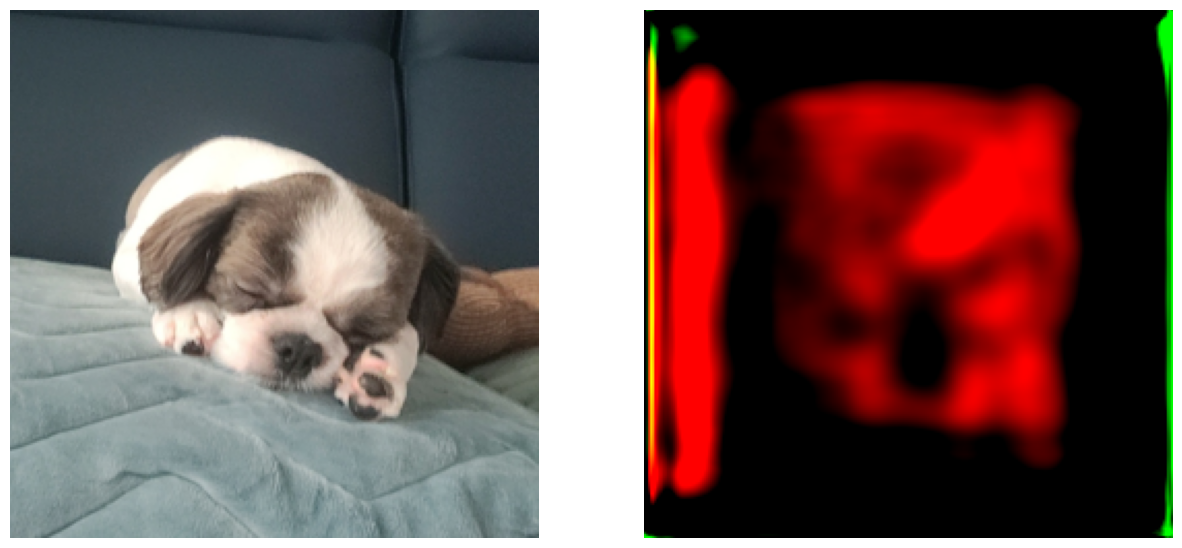

In [9]:
_, axes = plt.subplots(1, 2, figsize = (15, 7))
for img, ax in zip([np.array(image), recon_image * 255], axes):
    
    ax.imshow(img)
    ax.axis(False)